   # Diabetes analysis

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.formula.api as smf

In [2]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is C823-5BE5

 Directory of C:\Users\Disha Umat\Desktop\data science

03-05-2020  11:55    <DIR>          .
03-05-2020  11:55    <DIR>          ..
03-05-2020  11:33    <DIR>          .ipynb_checkpoints
21-04-2020  00:57           143,261 1.ipynb
09-04-2020  12:12    <DIR>          avocado-prices
07-04-2020  22:40           643,781 avocado-prices.zip
17-04-2020  01:38            23,929 canada_income.ipynb
17-04-2020  00:35               826 canada_per_capita_income.csv
03-05-2020  11:41           161,028 diabetes prediction.ipynb
17-04-2020  22:33            23,873 diabetes_data.csv
03-05-2020  11:55           175,174 diabities.ipynb
07-04-2020  23:16             9,515 price1.ipynb
13-04-2020  23:20           292,595 red_wine.ipynb
17-04-2020  22:40                 0 untitled
07-04-2020  23:18               555 Untitled.ipynb
07-04-2020  23:16                 0 untitled.txt
10-04-2020  22:55            84,199 winequality-red.csv
      

### Loading dataset

In [62]:
#reading data from file
df=pd.read_csv('diabetes_data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Knowing Dataset

#### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI,Blood Pressure Level Glucose level insulin level, age, Skin Thickness and Diabetes Pedigree Function


In [5]:
#to get no. of rows and columns and names of the columns
print(df.shape)
a=list(df)
print(a)

(768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [6]:
# to get information about each attribute/column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### To check for the null values present in the dataset

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### there is no missing values in the dataset. Dataset is collected neatly.

### Now we have to check if there are any 0's in the set

In [10]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

###  There are many 0's , we need to fill these 0's with appropriate values

In [12]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Replace all zeros with NANs. so that when means are calculated, zeros are not counted.

In [14]:
data_na=df.replace({'Glucose':0,'BloodPressure' : 0,'SkinThickness' : 0,'BMI' : 0 ,'Insulin' : 0,},np.NaN)                     


data_na.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

### Calcutating the mean of each columns

In [15]:
data_na.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [17]:
# replace Nan with mean values
data_na.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
data_na=df.fillna(df.mean())
data_na.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
data_na.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


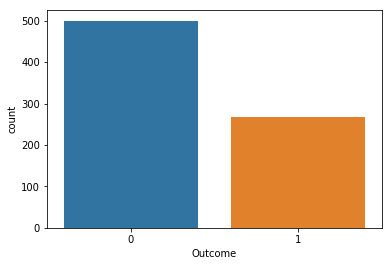

In [66]:
# countplot = shows counts of observations in each categorical usin bars
sns.countplot(x='Outcome',data=df)

## correlation between features/variables:

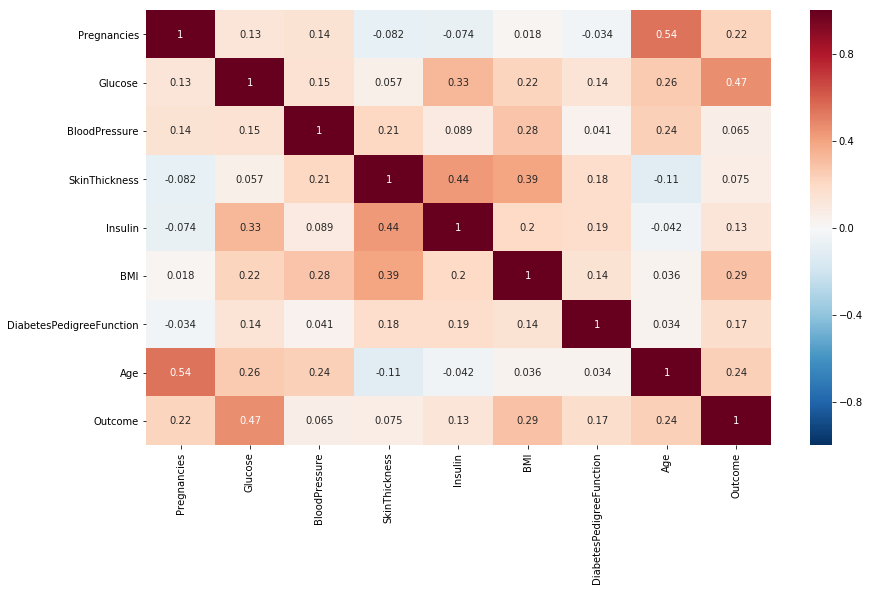

In [23]:
correlation=data_na.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,linewidths=0,vmin=-1,cmap='RdBu_r')

In [24]:
correlation['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### glucose and BMI having the greatest effect on outcome

[Text(0, 0.5, 'Glucose  percent'),
 Text(0.5, 0, 'Outcome dataset'),
 Text(0.5, 1.0, 'glucose percent dependency on outcomes')]

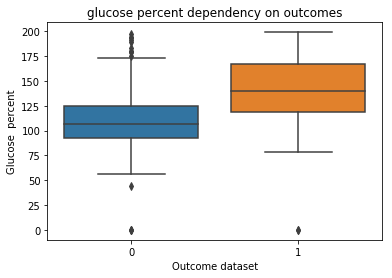

In [25]:
bx=sns.boxplot(x='Outcome',y='Glucose',data=df)
bx.set(xlabel='Outcome dataset', ylabel='Glucose  percent', title='glucose percent dependency on outcomes')

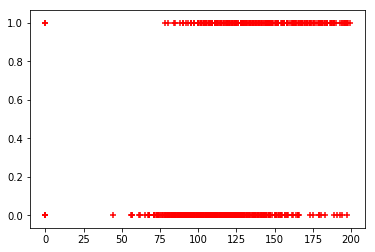

In [26]:
%matplotlib inline

plt.scatter(df.Glucose,df.Outcome,color='red',marker='+')

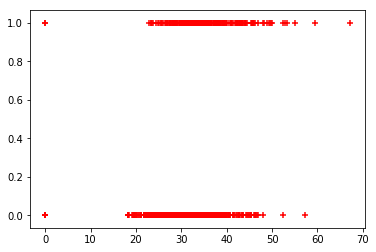

In [27]:
%matplotlib inline

plt.scatter(df.BMI,df.Outcome,color='red',marker='+')

In [ ]:
x=df[['Glucose','BMI','Age','Pregnancies','DiabetesPedigreeFunction']]
y=df[['Outcome']]

In [28]:
x=data_na.drop(['Insulin','BMI','DiabetesPedigreeFunction'],axis=1)

In [29]:
x=data_na[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction', 'Age']]
y=data_na['Outcome']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [32]:
len(x_train)

614

In [33]:
len(x_test)

154

### Using linear regression

In [34]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [35]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
reg.predict(x_test)

array([ 0.66648231,  0.71024758,  0.70710781,  0.35395475,  0.17688104,
        0.23668271,  0.28062829,  1.06477827,  0.78621114,  0.86079968,
        0.52821017,  0.30404755,  0.42037335,  0.34931145,  0.32966933,
        0.47662925,  0.56613697,  0.24845881,  0.13495406,  0.4788438 ,
        0.4616607 , -0.07052515,  0.46403921,  0.54915806,  0.78428144,
        0.17541056,  0.33475745,  0.68006729,  0.15786816,  0.38520497,
        0.75850006,  0.63598829,  0.34066455,  0.46245302,  0.2424231 ,
       -0.04325055,  0.62115392,  0.39358861,  0.43411381,  0.67310306,
        0.5237765 ,  0.65821645,  0.06242973,  0.16982189,  0.18948688,
        0.06093817,  0.13240663,  0.5813237 ,  0.31067816,  0.72004799,
        0.5157217 ,  0.17939586,  0.11208917,  0.3248703 ,  0.0241128 ,
        0.31530515,  0.53138725,  0.86856766,  0.40374108,  0.59766951,
        0.27399587,  0.12715971,  0.21574121,  0.3590573 ,  0.46262041,
        0.32392207,  0.58030158,  0.75442058,  0.36995414, -0.16

In [37]:
reg.score(x_test,y_test)

0.35513193882714966

### Using Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model=LogisticRegression()

In [40]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
model.predict(x_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [42]:
model.score(x_test,y_test)

0.8116883116883117

In [43]:
model.predict_proba(x_test)

array([[0.34773676, 0.65226324],
       [0.29688305, 0.70311695],
       [0.27100312, 0.72899688],
       [0.65052958, 0.34947042],
       [0.80186087, 0.19813913],
       [0.75332588, 0.24667412],
       [0.73101161, 0.26898839],
       [0.08204325, 0.91795675],
       [0.20547427, 0.79452573],
       [0.17582777, 0.82417223],
       [0.51523243, 0.48476757],
       [0.69374693, 0.30625307],
       [0.61212344, 0.38787656],
       [0.65667282, 0.34332718],
       [0.66274705, 0.33725295],
       [0.54859311, 0.45140689],
       [0.45610674, 0.54389326],
       [0.81217634, 0.18782366],
       [0.81201965, 0.18798035],
       [0.51635205, 0.48364795],
       [0.57422527, 0.42577473],
       [0.8971599 , 0.1028401 ],
       [0.58187407, 0.41812593],
       [0.44034335, 0.55965665],
       [0.26332411, 0.73667589],
       [0.7960008 , 0.2039992 ],
       [0.72979415, 0.27020585],
       [0.31467719, 0.68532281],
       [0.82971134, 0.17028866],
       [0.61424247, 0.38575753],
       [0.

In [ ]:
inputs=df.drop(['Outcome','BloodPressure','SkinThickness','Insulin'],axis='columns')
target=df['Outcome']

### Using Decison Tree Classifier

In [44]:
from sklearn import tree

In [45]:
model=tree.DecisionTreeClassifier()

In [46]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
model.score(x_test,y_test)

0.6948051948051948

In [49]:
model.predict([[148,33,50,6,0.627,89]])

array([1], dtype=int64)

### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
model.score(x_test,y_test)

0.8051948051948052

### SVM

In [53]:
from sklearn.svm import SVC

In [54]:
model=SVC(C=700)
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=700, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [55]:
model.score(x_test,y_test)

0.6428571428571429

#### From above the accuracy score of SVM and Logistic regression is higher than other models .
#### We can't rely on this result as it will change every time when train and test data changes everytime.
#### so we will use cross validation to get the result on which we can rely.
#### I am using cross validation using Stratified k fold.

## cross validation using Stratified k fold

In [56]:
from sklearn.model_selection import StratifiedKFold
def skf(model,a,b):
    f=StratifiedKFold(n_splits=30)
    scores=[]
    for train_index,test_index in f.split(a,b):
        x_train ,x_test,y_train,y_test=a.iloc[train_index],a.iloc[test_index],b.iloc[ train_index],b.iloc[test_index]
        model.fit(x_train,y_train)
        scores.append(model.score(x_test,y_test))
    return scores

###  Using Logistic regression

In [57]:
np.array(skf(LogisticRegression(),x,y)).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.7686324786324789

### Using Decision Tree Classifier

In [58]:
np.array(skf(tree.DecisionTreeClassifier(),x,y)).mean()

0.6954316239316238

### Using Random Forest Classifier

In [59]:
np.array(skf(RandomForestClassifier(n_estimators=100),x,y)).mean()

0.7738675213675213

### Using SVM

In [61]:
np.array(skf(SVC(C=100),x,y)).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6470598290598293

## So the maximum accuracy we get from  Logistic regression